In [ ]:
Credits: Sendtex

In [1]:
import torch 
import torchvision
from torchvision import transforms, datasets

In [2]:
import matplotlib.pyplot as plt

In [3]:
torch.__version__

'1.8.0+cu111'

In [4]:
train = datasets.MNIST(root='/home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST', train=True, transform=transforms.Compose([transforms.ToTensor()]), download=False) #Download must be true but I already downloaded the dataset so I put false

In [5]:
test = datasets.MNIST(root='/home/manju838/coding/env/pytorch_env/Datasets/MNIST/MNIST', train=False, transform=transforms.Compose([transforms.ToTensor()]), download=False)

In [6]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True) 
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [7]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [8]:
x, y = data[0][0], data[1][0]
print(y)

tensor(5)


In [9]:
print(x.shape)

torch.Size([1, 28, 28])


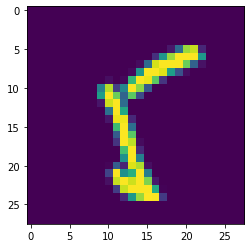

In [10]:
plt.imshow(x.reshape(28,28))
plt.show()

In [11]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


In [12]:
import torch.nn as nn 
import torch.nn.functional as F 

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() #Without this line we get cannot assign module before Module.__init__() call error
        self.fc1 = nn.Linear(784,64)
        self.fc2 = nn.Linear(64,64) #Before layer's output is this layer's input
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32,10) #We have 10 classes
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return(F.log_softmax(x, dim = 1) )
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [14]:
import torch.optim as optim 

optimizer = optim.Adam(net.parameters(), lr = 0.001)


In [15]:
EPOCHS = 3
for epoch in range(EPOCHS): 
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features(tensor of tensors corresponding to digits), y is the batch of labels.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.0432, grad_fn=<NllLossBackward>)
tensor(0.3682, grad_fn=<NllLossBackward>)
tensor(0.0640, grad_fn=<NllLossBackward>)


In [18]:
correct = 0
total = 0

with torch.no_grad():

    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: " + str(round(correct/total, 3)))


Accuracy: 0.977


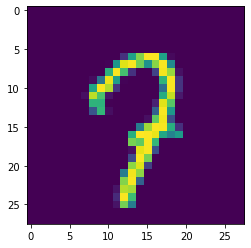

In [19]:
plt.imshow(X[0].view(28,28))
plt.show()

In [21]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(7)


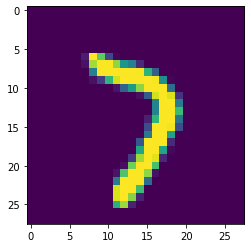

In [22]:
plt.imshow(X[1].view(28,28))
plt.show()

In [23]:
print(torch.argmax(net(X[1].view(-1,784))[0]))

tensor(7)


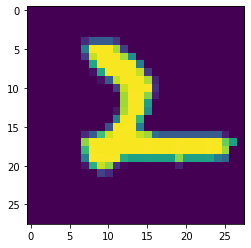

In [24]:
plt.imshow(X[2].view(28,28))
plt.show()

In [25]:
print(torch.argmax(net(X[2].view(-1,784))[0]))

tensor(2)
